In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#step 1 loading the data set
df=pd.read_csv("ship_fuel_efficiency.csv")
df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory usage: 112.6+ KB


In [4]:
df.isnull().sum()

,0
ship_id,0
ship_type,0
route_id,0
month,0
distance,0
fuel_type,0
fuel_consumption,0
CO2_emissions,0
weather_conditions,0
engine_efficiency,0


In [5]:
numeric_columns = ['distance' ,'CO2_emissions', 'engine_efficiency']
categoric_columns = ['ship_type', 'route_id', 'month', 'fuel_type',
        'weather_conditions']
numeric_columns ,categoric_columns

(['distance', 'CO2_emissions', 'engine_efficiency'],
 ['ship_type', 'route_id', 'month', 'fuel_type', 'weather_conditions'])

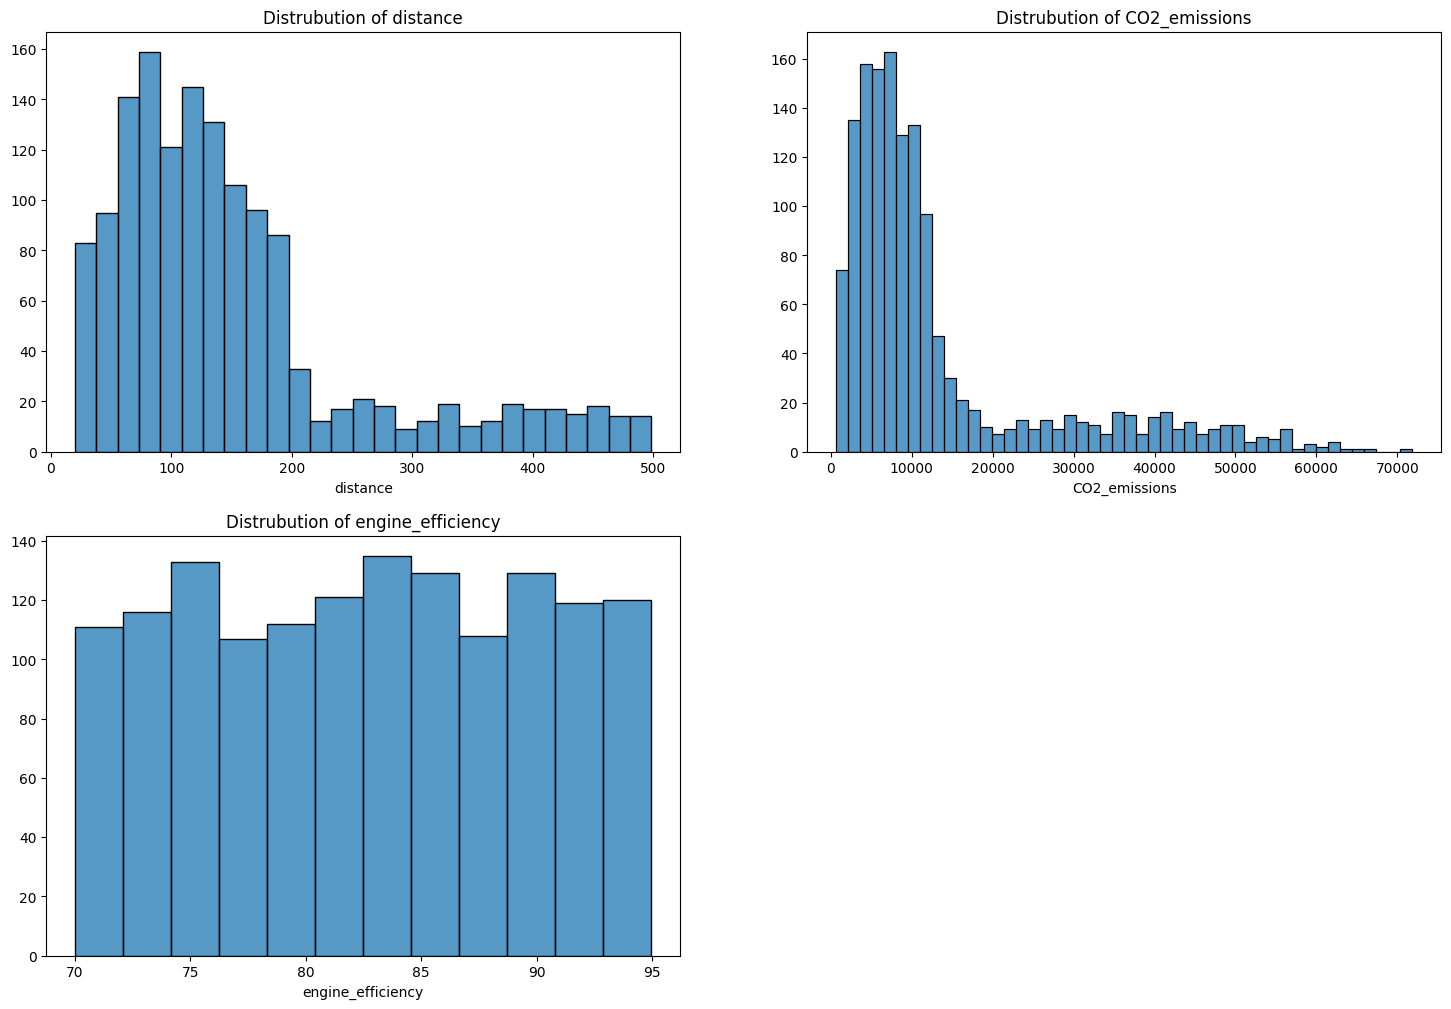

In [7]:
plt.figure(figsize=(18,12))
for i,col in enumerate(numeric_columns):
    i +=1
    plt.subplot(2,2,i)
    sns.histplot(x=df[col])
    plt.title(f"Distrubution of {col}")
    plt.xlabel(col)
    plt.ylabel(f"")
plt.show()


<ipython-input-11-e754da8b214e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette ="Set3")
<ipython-input-11-e754da8b214e>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-11-e754da8b214e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette ="Set3")
<ipython-input-11-e754da8b214e>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-11-e754da8b214e>:5: Fut

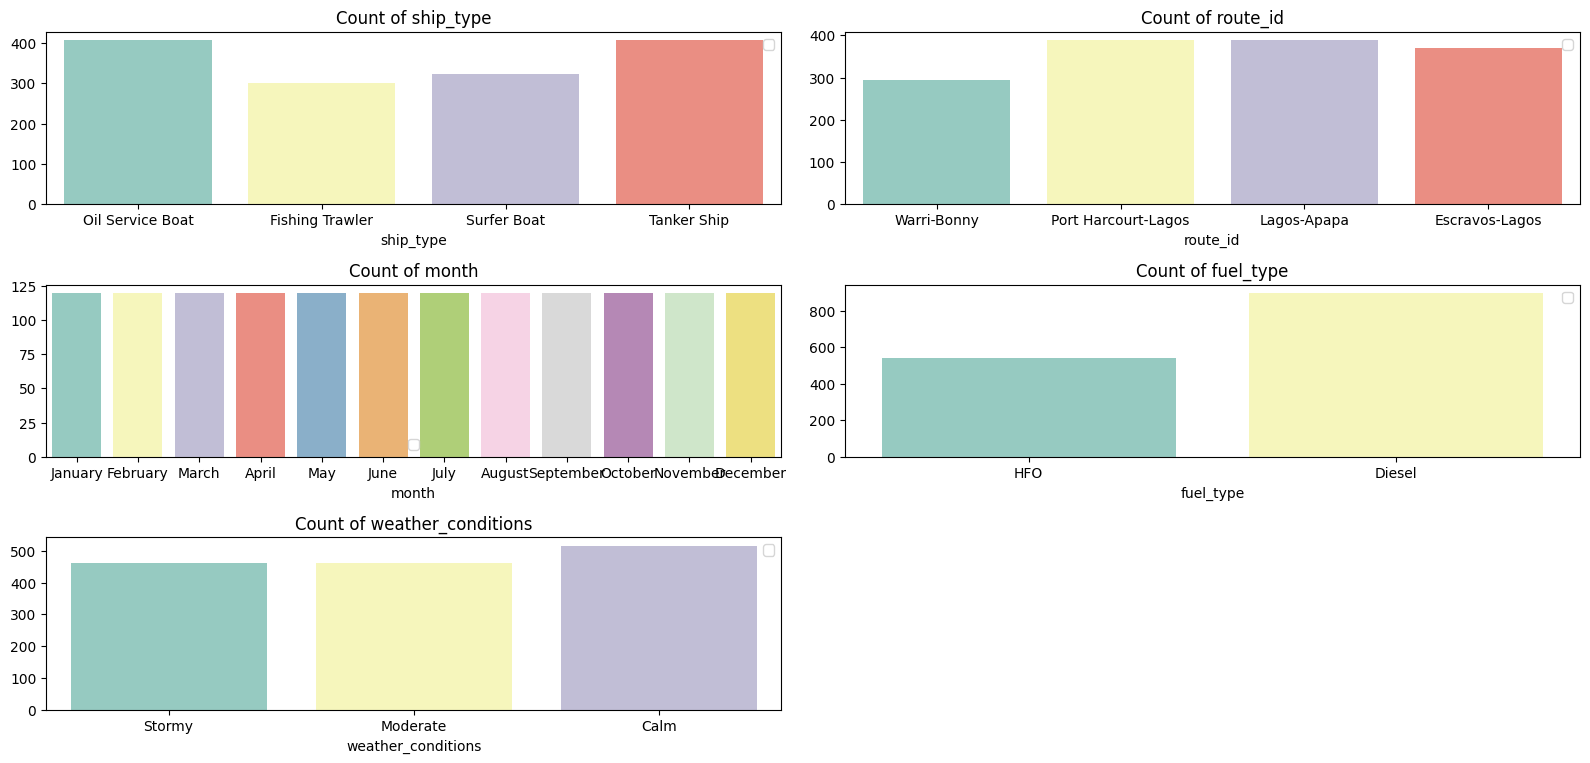

In [11]:
plt.figure(figsize=(16,25))
for i,col in enumerate(categoric_columns):
    i +=1
    plt.subplot(10,2,i)
    sns.countplot(x=df[col],palette ="Set3")
    plt.legend()
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel(f"")
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in categoric_columns:
    df[col] = label.fit_transform(df[col])

In [13]:
df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,1,3,4,132.26,1,3779.77,10625.76,2,92.14
1,NG001,1,2,3,128.52,1,4461.44,12779.73,1,92.98
2,NG001,1,2,7,67.30,1,1867.73,5353.01,0,87.61
3,NG001,1,2,0,71.68,0,2393.51,6506.52,2,87.42
4,NG001,1,1,8,134.32,1,4267.19,11617.03,0,85.61


In [14]:
dff = df[['ship_type', 'route_id', 'month', 'distance', 'fuel_type',
       'fuel_consumption', 'CO2_emissions', 'weather_conditions',
       'engine_efficiency']]

In [15]:
from sklearn.model_selection import train_test_split
x = dff.drop(columns=['fuel_consumption'])
y  = dff['fuel_consumption']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size =0.2 ,random_state = 42)
print(x_train.shape, y_train.shape , x_test.shape , y_test.shape)

(1152, 8) (1152,) (288, 8) (288,)


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

In [20]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

def evaluation_metrics(model,y_true,y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = mse ** 0.5
    print(f"ML model : {model}")
    print("Mean Absolute Error : ", mae)
    print("Mean Squared Error : ",mse)
    print("Root Mean Squared Error : ",rmse)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
evaluation_metrics("Linear Regression",y_test,lr_pred)

ML model : Linear Regression
Mean Absolute Error :  219.07753855419577
Mean Squared Error :  120056.92574263879
Root Mean Squared Error :  346.49231700376674


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
evaluation_metrics("Linear Regression",y_test,lr_pred)

ML model : Linear Regression
Mean Absolute Error :  219.07753855419577
Mean Squared Error :  120056.92574263879
Root Mean Squared Error :  346.49231700376674
************************************************************************************************************************************************************************************************************************************************************************************************************
